In [28]:
import sys
import os
sys.path.append('/root/GanLuo/PullSum_MNIST/code/神经网络实验/MNIST最终实验')
import torch
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from new_network_func import *
from search_parameter import *
import optuna

In [29]:
n=20
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=ring3()#A=get_xinmeng_like_matrix(n=10,seed=99).T
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_20_hard_linear_mix(p1=0.92, seed=42)

A的第二大特征值: 0.9155783932473737
A的beta: 0.9789040533164065
A的spectral gap: 0.02109594668359349
A的kappa: 2.000000000000004
S_A是: 717.8615396461071 

1.5945e+00, 8.4396e+02


Training Progress: 100%|██████████| 1000/1000 [11:18<00:00,  1.47it/s, accuracy=66.4700000000%, epoch=1000, loss=1.9792912245]


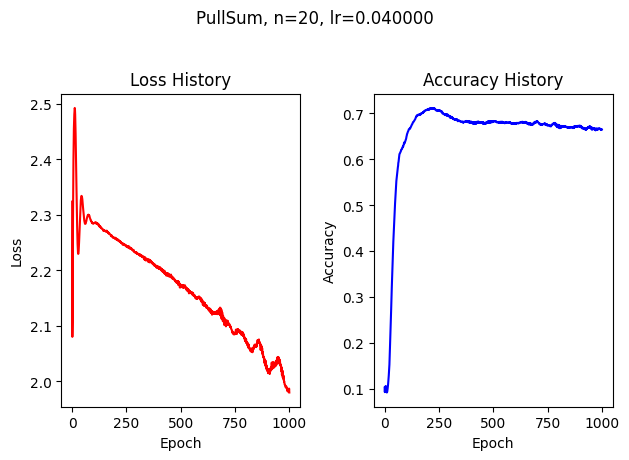

In [39]:
Sum_l1, Sum_a1 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=2e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 1000/1000 [11:36<00:00,  1.44it/s, accuracy=57.3200000000%, epoch=1000, loss=2.1865528345]


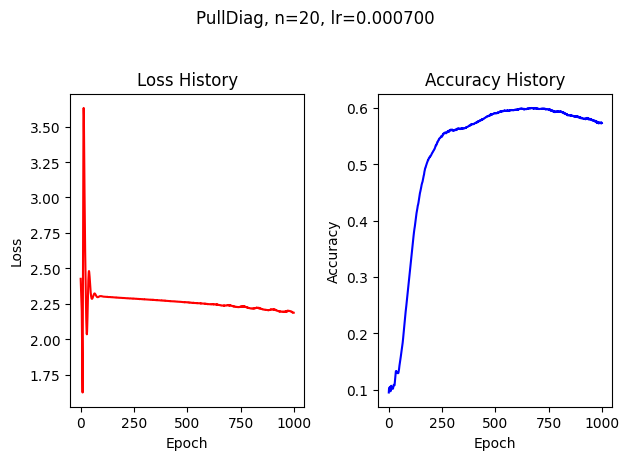

In [40]:
Diag_l1, Diag_a1 = train_PullDiag(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=1000,
    lr=7e-4,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 200/200 [02:15<00:00,  1.48it/s, accuracy=64.6300000000%, epoch=200, loss=2.1364464283]


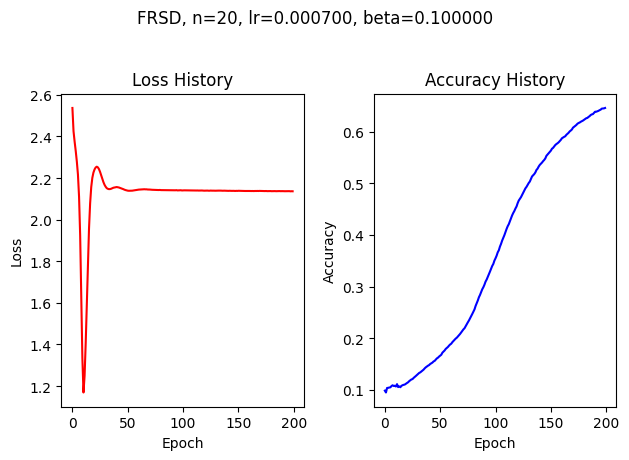

In [33]:
FRSD_l1,FRSD_a1 = train_FRSD(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=200,
    lr=7e-4,
    beta=0.1,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 200/200 [02:13<00:00,  1.50it/s, accuracy=69.5300000000%, epoch=200, loss=2.0569869995]


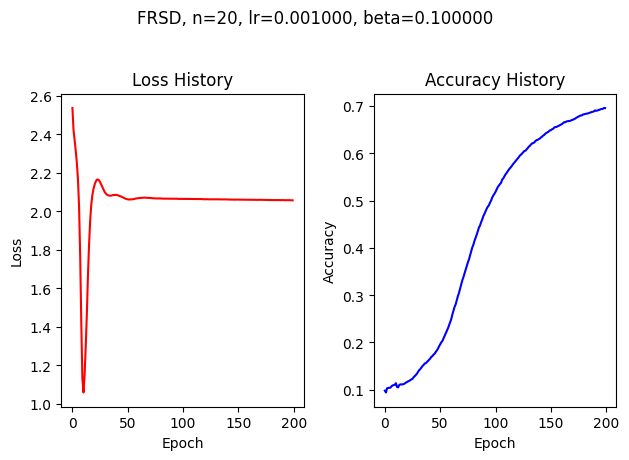

In [34]:
FRSD_l2,FRSD_a2 = train_FRSD(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=200,
    lr=1e-3,
    beta=0.1,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 200/200 [02:12<00:00,  1.51it/s, accuracy=69.0000000000%, epoch=200, loss=1.7469237924]


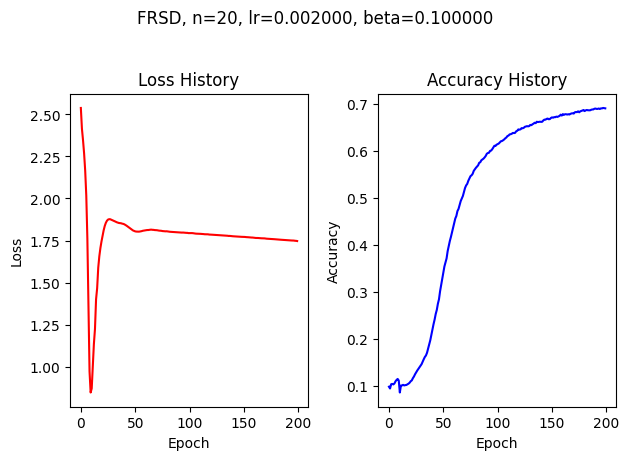

In [36]:
FRSD_l3,FRSD_a3 = train_FRSD(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=200,
    lr=2e-3,
    beta=0.1,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 200/200 [02:14<00:00,  1.49it/s, accuracy=41.3100000000%, epoch=200, loss=1.3466675639]


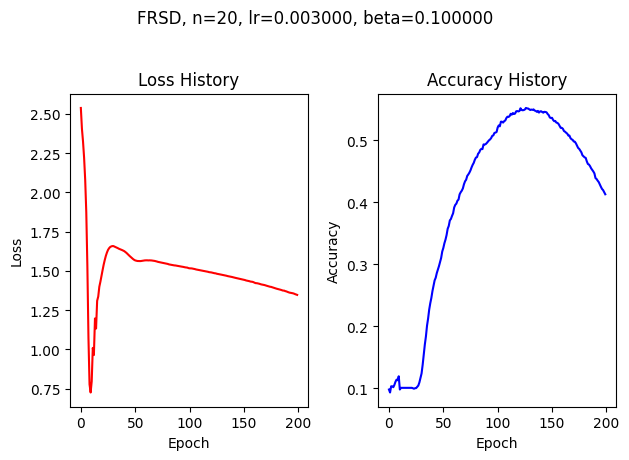

In [37]:
FRSD_l4,FRSD_a4 = train_FRSD(
    n=n,
    A=A,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=200,
    lr=3e-3,
    beta=0.1,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

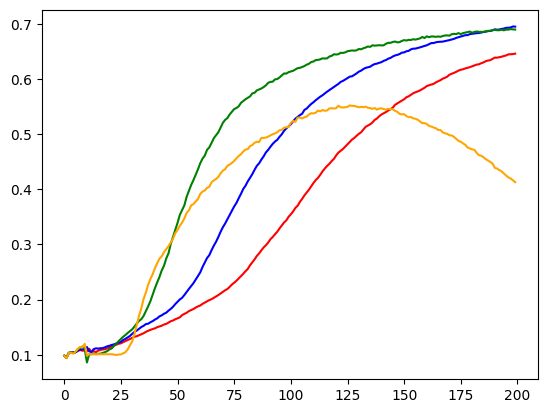

In [38]:
plt.plot(FRSD_a1,color='r')
plt.plot(FRSD_a2,color='b')
plt.plot(FRSD_a3,color='g')
plt.plot(FRSD_a4,color='orange')
plt.show()

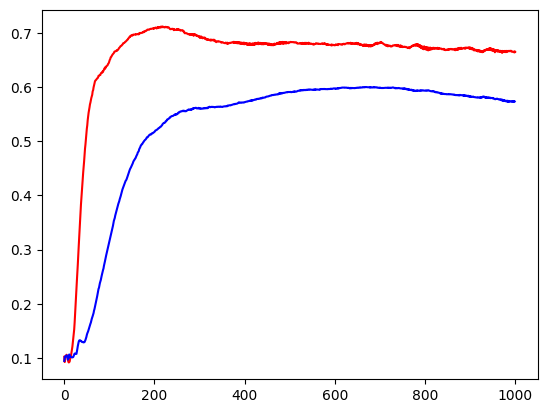

In [41]:
plt.plot(Sum_a1,color='r')
plt.plot(Diag_a1,color='b')
plt.show()